### NAME : RETHINAGIRI G

### ROLL NO : 225229130

### COURSE TITLE : PRACTICAL MACHINE LEARNING LAB

### LAB-05 . Diabetes Classification using Logistic Regression

#  

#### Step1.  Import Data

In [1]:
import pandas as pan

In [2]:
dbs=pan.read_csv("C:\\Users\\user\\Downloads\\dataset_pml\\diabetes.csv")

In [3]:
dbs.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dbs.shape

(768, 9)

In [5]:
dbs.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
type(dbs)

pandas.core.frame.DataFrame

In [7]:
dbs.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
dbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dbs["Insulin"].value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64>

# 

##### Step2. Build Logistic Regression Model

In [10]:
X=dbs.drop(["Outcome"],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y=dbs["Outcome"].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit as sss
sss =sss( test_size=0.25, random_state=0)
ss=sss.get_n_splits(X, y)
ss

10

In [13]:
for r,(train_index,test_index) in enumerate (sss.split(X,y)):
    print(r)
    print("Train    : ",train_index)
    print("Test    : ",test_index)

0
Train    :  [432 453 706 606 118 421   3 157 400 497 296  30 201 314  32 475 501 293
 681 381 346  34 119 642 248 397 101 645 498 659 182 154 531 210 437 528
 763 533 666 382 160 197 176 555  18 699 518  29 585 404 486 332 650  33
  75 766 510 207 580 656 683 423 385 436 704 185 292 216 517 304 179 126
  97  39 608  31 167  85 256 647 424 581 653 470 617 260 224 741 250 193
 217 204 233 543 625 302 509 371 223 440 549 365 552  37 258 646 500  82
 384 262  44 758 348 511 383 760 430 689 394  28 120 412 635  17 220 150
 724 406   2 364 698 445 226 722 367 135 271  86 718  73 428 513 275 759
 707  13 350 621  23 629 597 558 249 672 599 756 410 477 491 172 715  40
 184 420 447 206 578 251 560 143 557  57 316 326  61 244 730  95 173 211
 106 246 512 257  52 640 317  22 564 561 419 343 214 312 196 155 130 213
 141 750 283 618 468 527 269 186 754 255 731 502 396 716 376 664 146 753
 401 170 748  83 110 733 209   7 630 408 624 417 116 728 550 124 690 321
 612 366 631 131 341 200 586  70 450 

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=.25,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression as lr

In [16]:
logi=lr(penalty='l2',C=10.0)

In [17]:
logi.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10.0)

In [18]:
y_pred=logi.predict(X_test)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# 

##### Step3. predict on a new sample

In [19]:
pre=logi.predict([[6,200,90,10,25,23.3,0.672,42]])
if pre==0:
    print("Non-diabetic patient",pre)
else:
    print("Diabetic patient",pre)

Diabetic patient [1]


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


##### Compute Classification Metrics

In [20]:
from sklearn.metrics import *

In [21]:
 accuracy_score(y_test, y_pred)

0.7291666666666666

In [22]:
precision_score(y_test,y_pred)

0.6164383561643836

In [23]:
recall_score(y_test,y_pred)

0.6521739130434783

In [24]:
roc_auc_score(y_test,y_pred)

0.7122658183103571

# 

##### Step4. Understand Correlation

In [25]:
from sklearn.metrics import confusion_matrix as cfmx
cf=cfmx(y_test,y_pred)
cf

array([[95, 28],
       [24, 45]], dtype=int64)

<AxesSubplot:>

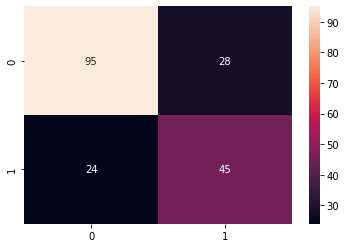

In [26]:
import seaborn as sb
sb.heatmap(cf,annot=True)

# 

##### Step5. Normalization using MinMaxScaler and rebuild LoR

In [27]:
from sklearn.preprocessing import MinMaxScaler as mms
ms=mms()
ms_X_train=ms.fit_transform(X_train)
ms_X_train

array([[0.76470588, 0.64824121, 0.        , ..., 0.59463487, 0.20964987,
        0.38333333],
       [0.23529412, 0.64824121, 0.70491803, ..., 0.52309985, 0.06532878,
        0.03333333],
       [0.17647059, 0.30653266, 0.67213115, ..., 0.51266766, 0.0704526 ,
        0.41666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [28]:
ms_X_test=ms.transform(X_test)
ms_X_test

array([[0.35294118, 0.49246231, 0.47540984, ..., 0.50670641, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.6147541 , ..., 0.53204173, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.52459016, ..., 0.45901639, 0.03415884,
        0.        ],
       ...,
       [0.35294118, 0.61809045, 0.59016393, ..., 0.50074516, 0.27967549,
        0.21666667],
       [0.17647059, 0.3919598 , 0.40983607, ..., 0.46199702, 0.07258753,
        0.08333333],
       [0.17647059, 0.53266332, 0.59016393, ..., 0.38450075, 0.05508113,
        0.1       ]])

In [29]:
ms_lr=lr()
ms_lr.fit(ms_X_train,y_train)
ms_y_pred=ms_lr.predict(ms_X_test)
print("Predictions of scaled data using MinMaxScaler:",ms_y_pred)

Predictions of scaled data using MinMaxScaler: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0]


In [30]:
accuracy_score(y_test, ms_y_pred)

0.7291666666666666

In [31]:
precision_score(y_test,ms_y_pred)

0.639344262295082

In [32]:
recall_score(y_test,ms_y_pred)

0.5652173913043478

In [33]:
roc_auc_score(y_test,y_pred)

0.7122658183103571

# 

##### Step6. Normalization using StandardScalar and rebuild LoR

In [34]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_X_train=ss.fit_transform(X_train)
ss_X_train

array([[ 2.80346794,  0.25977903, -3.78077929, ...,  1.03974028,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.25977903,  0.89724451, ...,  0.40945373,
        -0.70087555, -0.86295593],
       [-0.22446668, -1.85825286,  0.67966201, ...,  0.31753694,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.61235174,  0.89724451, ...,  1.78820556,
         1.96850229,  0.44167036],
       [-1.13284707,  0.63354937, -3.78077929, ...,  1.36801453,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.13518892,  1.44120077, ..., -1.24504846,
        -0.6094383 , -1.03690611]])

In [35]:
ss_X_test=ss.transform(X_test)
ss_X_test

array([[ 0.6839137 , -0.70579433, -0.625833  , ...,  0.26501306,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.26972894,  0.29889263, ...,  0.48823955,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.39431905, -0.29945925, ..., -0.15517797,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.07289387,  0.13570575, ...,  0.21248918,
         0.77981801,  0.09377001],
       [-0.22446668, -1.32874488, -1.06099801, ..., -0.12891603,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.45661411,  0.13570575, ..., -0.81172646,
        -0.77166568, -0.51505559]])

In [36]:
ss_lor=lr()
ss_lor.fit(ss_X_train,y_train)
ss_y_pred=ss_lor.predict(ss_X_test)

In [37]:
ss_y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
accuracy_score(y_test,ss_y_pred)

0.7291666666666666

In [39]:
precision_score(y_test,ss_y_pred)

0.6164383561643836

In [40]:
recall_score(y_test,ss_y_pred)

0.6521739130434783

In [41]:
roc_auc_score(y_test,ss_y_pred)

0.7122658183103571

# 

##### Step7. Plot ROC curve

In [42]:
pred_prob1=ss_lor.predict_proba(ms_X_test)

In [43]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

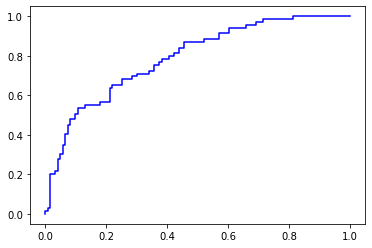

In [44]:
import matplotlib.pyplot as plt
plt.plot(fpr1,tpr1,linestyle='-',color='blue',label='MinMaxScaler values')

# 

##### Step8. Comparison with KNN classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNC
knn=KNC(n_neighbors=4)
knn=knn.fit(X_train,y_train)

In [46]:
knn_y_pred=knn.predict(X_test)

In [47]:
from sklearn.preprocessing import MinMaxScaler as ms
mi=ms()
mi_X_train=mi.fit_transform(X_train)
mi_X_train

array([[0.76470588, 0.64824121, 0.        , ..., 0.59463487, 0.20964987,
        0.38333333],
       [0.23529412, 0.64824121, 0.70491803, ..., 0.52309985, 0.06532878,
        0.03333333],
       [0.17647059, 0.30653266, 0.67213115, ..., 0.51266766, 0.0704526 ,
        0.41666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

In [48]:
mi_X_test=mi.transform(X_test)
mi_X_test

array([[0.35294118, 0.49246231, 0.47540984, ..., 0.50670641, 0.15029889,
        0.36666667],
       [0.11764706, 0.56281407, 0.6147541 , ..., 0.53204173, 0.02988898,
        0.        ],
       [0.11764706, 0.54271357, 0.52459016, ..., 0.45901639, 0.03415884,
        0.        ],
       ...,
       [0.35294118, 0.61809045, 0.59016393, ..., 0.50074516, 0.27967549,
        0.21666667],
       [0.17647059, 0.3919598 , 0.40983607, ..., 0.46199702, 0.07258753,
        0.08333333],
       [0.17647059, 0.53266332, 0.59016393, ..., 0.38450075, 0.05508113,
        0.1       ]])

In [49]:
mi_knn=KNC()
mi_knn=mi_knn.fit(mi_X_train,y_train)

In [50]:
mi_y_pred=mi_knn.predict(mi_X_test)
mi_y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [51]:
accuracy_score(y_test,mi_y_pred)

0.6770833333333334

In [52]:
precision_score(y_test,mi_y_pred)

0.5522388059701493

In [53]:
recall_score(y_test,mi_y_pred)

0.5362318840579711

In [54]:
roc_auc_score(y_test,mi_y_pred)

0.6461647225167905

##### Step9. Update ROC curve

In [55]:
pred_prob2=mi_knn.predict_proba(mi_X_test)

fpr2,tpr2,thresh2=roc_curve(y_test,pred_prob2[:,1],pos_label=1)

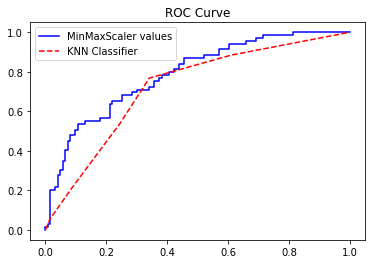

In [56]:
plt.plot(fpr1,tpr1,linestyle='-',color='blue',label='MinMaxScaler values')
plt.plot(fpr2,tpr2,linestyle='--',color='red',label='KNN Classifier')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

# 

##### Step10. Regularization

In [57]:
from sklearn.linear_model import LogisticRegressionCV
model1=LogisticRegressionCV(Cs=10,cv=4,penalty='l1',solver='liblinear')
model2=LogisticRegressionCV(Cs=10,cv=4,penalty='l2')

In [58]:
model1.fit(ms_X_train,y_train)
model2.fit(ms_X_train,y_train)

LogisticRegressionCV(cv=4)

In [59]:
rg_y_pred1 = model1.predict(ms_X_test)
rg_y_pred2 = model2.predict(ms_X_test)

In [60]:
from sklearn.metrics import roc_auc_score
l1_auc = roc_auc_score(y_test, rg_y_pred1)
l1_auc = (' LOR L1 MINMAX AUC', l1_auc)
l1_auc

(' LOR L1 MINMAX AUC', 0.694591728525981)

In [61]:
from sklearn.metrics import roc_auc_score
l2_auc = roc_auc_score(y_test, rg_y_pred2)
l2_auc = (' LOR L2 MINMAX AUC', l2_auc)
l2_auc

(' LOR L2 MINMAX AUC', 0.7090844821491693)

# 

##### Step11. Update ROC curve

In [62]:
pred_prb7 = model1.predict_proba(ms_X_test)
pred_prb8 = model2.predict_proba(ms_X_test)

In [63]:
fpr,tbr,threshold = roc_curve(y_test, pred_prob1[:,1],pos_label=1)
fpr1,tbr1,threshold1 = roc_curve(y_test, pred_prob2[:,1],pos_label=1)
fpr2,tbr2,threshold2= roc_curve(y_test, pred_prb7[:,1],pos_label=1)
fpr3,tbr3,threshold3 = roc_curve(y_test, pred_prb8[:,1],pos_label=1)

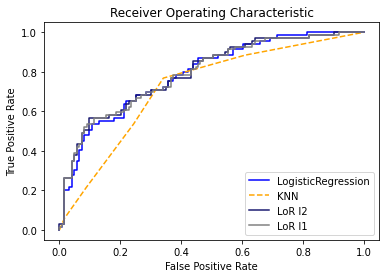

In [64]:
plt.plot(fpr, tbr, linestyle='-', color='blue', label='LogisticRegression')
plt.plot(fpr1, tbr1, linestyle='--', color='orange', label='KNN')
plt.plot(fpr3, tbr3, linestyle='-', color='midnightblue', label='LoR l2')
plt.plot(fpr2, tbr2, linestyle='-', color='gray', label='LoR l1')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'best')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()